# **PROJECT TITLE: SENTIMENT CLASSIFICATION OF PRODUCT-RELATED TWEETS USING NLP**

![Twitter](Images/Twitter.png)

# **BUSINESS UNDERSTANDING** 

## **PROJECT OVERVIEW**
This project focuses on building a machine learning model to classify the sentiment expressed in tweets about products or brands, using Natural Language Processing (NLP) techniques. The task is defined as a binary/multi-class classification problem, where the model determines which emotion/sentiment a tweet is expressing directed at a specific brand or product. The project uses a dataset of labeled tweets (tweet_product_company.csv) and involves text preprocessing, exploratory data analysis (EDA), handling class imbalance, feature engineering, and preparing data for model training. The final model will enable automated monitoring of customer sentiment on social media platforms, providing valuable insights for businesses.

## **PROBLEM STATEMENT**
Businesses face the challenge of efficiently analyzing large volumes of tweets to determine whether they contain emotions directed at their products or brands. The dataset (tweet_product_company.csv) consists of 9,093 tweets, each with text content, a column indicating the target of any emotion (e.g., iPhone, iPad, Google, or "None" for missing values), and a label categorizing the sentiment as "Positive emotion," "Negative emotion," "No emotion toward brand or product," or "I can't tell." A significant issue is the class imbalance, with 59.2% of tweets labeled as "No emotion toward brand or product," 32.7% as "Positive emotion," 6.3% as "Negative emotion," and 1.7% as "I can't tell," which complicates accurate classification. Additionally, the dataset contains noise such as URLs, mentions, and punctuation, and the emotion_in_tweet_is_directed_at column has 5,802 missing values, making it challenging to leverage this feature effectively. The presence of duplicate tweets (22 instances) and one missing tweet_text entry further complicates data quality. The primary problem is to accurately classify whether a tweet expresses an emotion directed at a brand or product based solely on its text content, amidst these challenges of class imbalance, noisy text data, and incomplete metadata.

## **OBJECTIVES**
1. To analyse how sentiment categories (positive, negative, neutral) correlate with the presence of specific brand or product mentions in tweets, in order to determine patterns of directed sentiment.

2. To apply and compare multiple text feature extraction techniques (such as TF-IDF and n-grams) to enhance the model’s ability to detect brand-directed emotional language.

3. To train and evaluate various machine learning models for accurately classifying whether a tweet expresses an emotion toward a brand or product.

4. To interpret the model outputs using performance metrics such as accuracy, precision, recall, and F1-score to ensure relevance for real-time brand sentiment monitoring.

5. To demonstrate how the resulting model can support businesses in identifying and responding to product-related customer emotions at scale through automated sentiment detection on social media platforms


# **1. DATA LOADING & EXPLORATION**
Before diving into analysis or modeling, it’s essential to load the dataset properly and explore its structure to understand what kind of data you're working with.

🔹 a) . Data Loading
We start by importing the necessary libraries and reading the dataset using pandas. Due to encoding issues that may arise when reading text data, we use the 'ISO-8859-1' encoding instead of the default 'utf-8'.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re
import string
from collections import Counter
from sklearn.utils import resample

In [2]:
# Loading the dataset
df_Tweet = pd.read_csv('Data/tweet_product_company.csv', encoding='ISO-8859-1')

# Preview the first 5 rows
df_Tweet.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


🔹 b) . Basic Dataset Information
Understanding the size and structure of the dataset helps inform how we’ll process it.

In [3]:
# Check number of rows and columns
df_Tweet.shape


(9093, 3)

In [4]:
# Display column names
df_Tweet.columns


Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [5]:
# Get basic information about data types and missing values
df_Tweet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


🔹 c). Statistical Summary
We can describe the numerical columns (if any) to see general trends like average values, min/max, and standard deviations.


In [6]:
# Summary statistics of the dataset
df_Tweet.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [7]:
# For categorical or text columns
df_Tweet.describe(include=['object'])


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [8]:
# Change column names
df_Tweet.columns = ['text', 'target', 'sentiment']
df_Tweet.head()


,text,target,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


🔹 d). Checking for Missing Values

In [9]:
# Check for missing values in the dataset
df_Tweet.isnull().sum()

text            1
target       5802
sentiment       0
dtype: int64

🔹 5. Duplicate Check

In [10]:
# Check for duplicate rows
df_Tweet.duplicated().sum()

22

# **2.DATA PREPROCESSING**
This is where raw data is transformed, cleaned, and prepared for analysis or modeling.

 1. tweet_text — Missing: 1 row
This is the most critical feature because your model relies on the content of the tweet to predict sentiment.

2. emotion_in_tweet_is_directed_at — Missing: 5802 rows
This column indicates whether the emotion is directed at a brand/product. It may be useful as a feature, but it's not essential for basic sentiment classification based on text.

In [11]:
class TweetCleaner:
    def __init__(self, df):
        self.df = df.copy()
    
    def clean_text(self):
        # Lowercase text
        self.df['clean_text'] = self.df['text'].astype(str).str.lower()
        
        # Add word count
        self.df['word_count'] = self.df['clean_text'].apply(lambda x: len(x.split()))
        return self
    
    def filter_sentiment(self):
        # Filter to only Positive and Negative sentiments
        self.df = self.df[self.df['sentiment'].isin(['Positive emotion', 'Negative emotion'])].copy()
        return self
    
    def map_binary_labels(self):
        # Map Positive = 1, Negative = 0
        self.df['emotion_binary'] = self.df['sentiment'].map({
            'Positive emotion': 1,
            'Negative emotion': 0
        })
        return self
    
    def balance_classes(self):
        # Handle imbalance via upsampling
        from sklearn.utils import resample
        positive = self.df[self.df['emotion_binary'] == 1]
        negative = self.df[self.df['emotion_binary'] == 0]
        negative_upsampled = resample(
            negative,
            replace=True,
            n_samples=len(positive),
            random_state=42
        )
        self.df = pd.concat([positive, negative_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)
        return self
    
    def get_clean_df(self):
        return self.df


In [12]:
# Apply OOP class
cleaner = TweetCleaner(df_Tweet)
df_Tweet = (
    cleaner
    .clean_text()
    .filter_sentiment()
    .map_binary_labels()
    .balance_classes()
    .get_clean_df()
)

In [13]:
# Standardizes product names into brand categories and shows the number of tweets for each brand.
print("Target value count before mapping:",df_Tweet['target'].value_counts())
brand_mapping = {
    'iPad': 'Apple',
    'Apple': 'Apple',
    'iPad or iPhone App': 'Apple',
    'iPhone': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Google',
    'Other Google product or service': 'Google',
    'Android App': 'Google',
    'Android': 'Google',
    "None": "None"
}

# Apply the mapping to create new brand column
df_Tweet['brand'] = df_Tweet['target'].map(brand_mapping)
df_Tweet['brand'].value_counts()

Target value count before mapping: iPad                               1410
Apple                              1034
iPad or iPhone App                  754
iPhone                              728
Google                              709
Other Google product or service     478
Android App                         119
Android                             113
Other Apple product or service       44
Name: target, dtype: int64


Apple     3970
Google    1419
Name: brand, dtype: int64

## **3.EDA (DATA ANALYSIS) & DATA VISUALIZATION**
EDA is like getting to know my data — it’s the first step where i carefully examined the dataset to understand its main characteristics.

Data Visualization is the process of creating charts, graphs, and maps that turn numbers and data into pictures.

### **1. UNIVARIATE ANALYSIS**
#### Checking for distribution of the data and visualizing it.

#### Univariate analysis is the simplest form of data analysis — it examines just one variable at a time.

#### Examples include: Bar Graphs, Histogram, Box Plot, Pie Chart

Class imbalance may exist, which is important to handle before training a model (through resampling or class weighting).

🔹 a) Tweet Length Distribution 

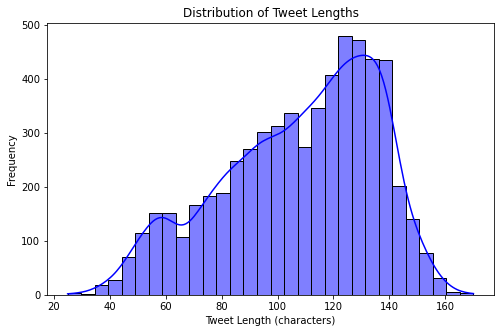

In [14]:
# Check distribution of Tweet lengths
df_Tweet['tweet_length'] = df_Tweet['text'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df_Tweet['tweet_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

Most tweets are between 50–150 characters, suggesting tweets are short-form.

🔹 b) Word Count Distribution

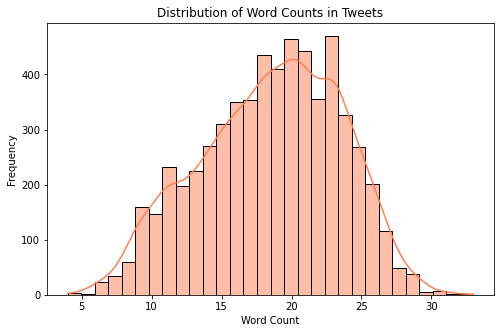

In [15]:
# Check the distribution of word counts in tweets
df_Tweet['word_count'] = df_Tweet['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df_Tweet['word_count'], bins=30, kde=True, color='coral')
plt.title('Distribution of Word Counts in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


Tweets have 5 to 20 words on average.

Confirms that token-level feature engineering is manageable.


### **2. BIVARIATE ANALYSIS**
#### Checking for correlations; multiple Xs and Y

#### Bivariate analysis explores the relationship between two variables.

#### Purpose: To identify whether and how the variables are related — for example, does one increase when the other does?

#### Examples include: Heatmaps, Line Graphs,Bar Plot, Scatter Plot .

🔹 a) Tweet Length vs Sentiment (Target)

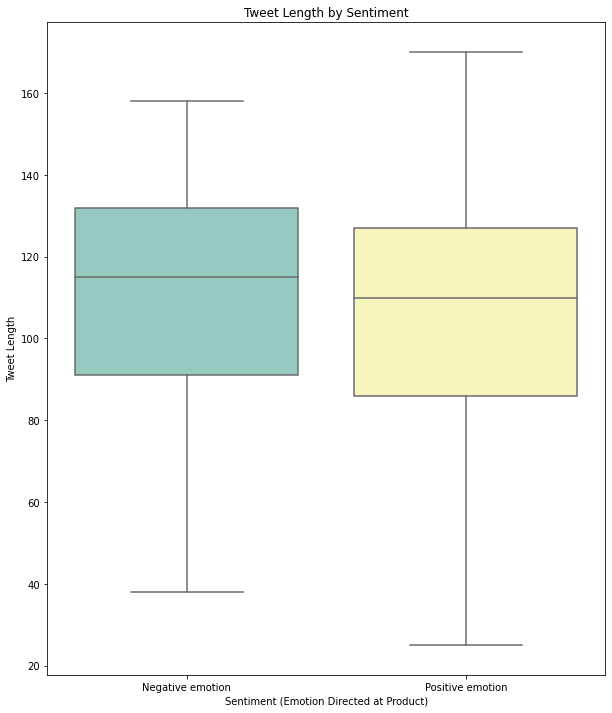

In [16]:
#  Adding tweet length (character count)
df_Tweet['tweet_length'] = df_Tweet['text'].astype(str).apply(len)

# Adding word count (number of words in each tweet)
df_Tweet['word_count'] = df_Tweet['text'].astype(str).apply(lambda x: len(x.split()))


# Boxplot of Word Count by Sentiment
plt.figure(figsize=(10, 12))
sns.boxplot(
    data=df_Tweet,
    x='sentiment',  
    y='tweet_length',
    palette='Set3'
)
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment (Emotion Directed at Product)')
plt.ylabel('Tweet Length')
plt.show()


Tweets marked with emotion (Yes) are generally longer.

Therefore the tweet length may be predictive of emotional content and can be included as a feature in modeling.

🔹 b) Word Count vs Sentiment

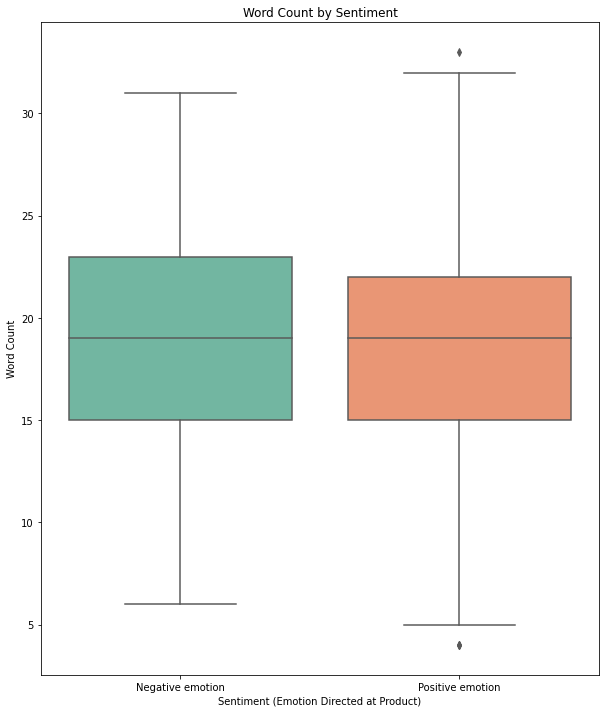

In [17]:
# Boxplot of Word Count by Sentiment
plt.figure(figsize=(10,12))
sns.boxplot(data=df_Tweet, 
            x='sentiment', 
            y='word_count', 
            palette='Set2')
plt.title('Word Count by Sentiment')
plt.xlabel('Sentiment (Emotion Directed at Product)')
plt.ylabel('Word Count')
plt.show()


Emotional tweets tend to have more words, suggesting wordiness correlates with sentiment.

### **3. MULTIVARIATE ANALYSIS**

#### way of exploring how three or more variables (characteristics) relate to each other at the same time.

#### Purpose: To understand complex relationships and interactions among multiple variables.

#### Examples include: Heatmaps, Scatterplots, Pairplots, 3D Scatter Plot, Parallel Coordinates Plot


🔹 a) Emotion Target vs Sentiment

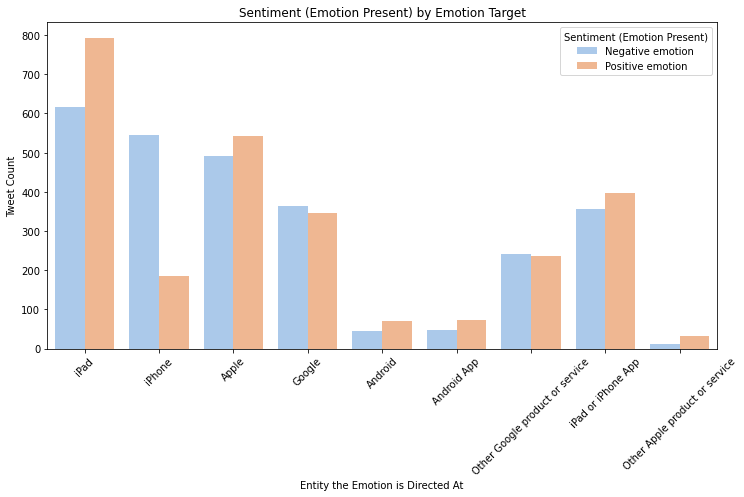

In [18]:
# Countplot of Sentiment (Emotion Present) by Emotion Target
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_Tweet, 
    x='target', 
    hue='sentiment', 
    palette='pastel'
)
plt.xticks(rotation=45)
plt.title('Sentiment (Emotion Present) by Emotion Target')
plt.xlabel('Entity the Emotion is Directed At')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment (Emotion Present)')
plt.show()


Some entities like 'Apple', 'iPad', and 'Google' receive a significantly higher number of emotionally-labeled tweets compared to others.

This suggests that the entity being mentioned influences the presence of sentiment.

**You can engineer a categorical feature from emotion_in_tweet_is_directed_at using target encoding or one-hot encoding.**

🔹 b) Tweet Length by Sentiment and Emotion Target

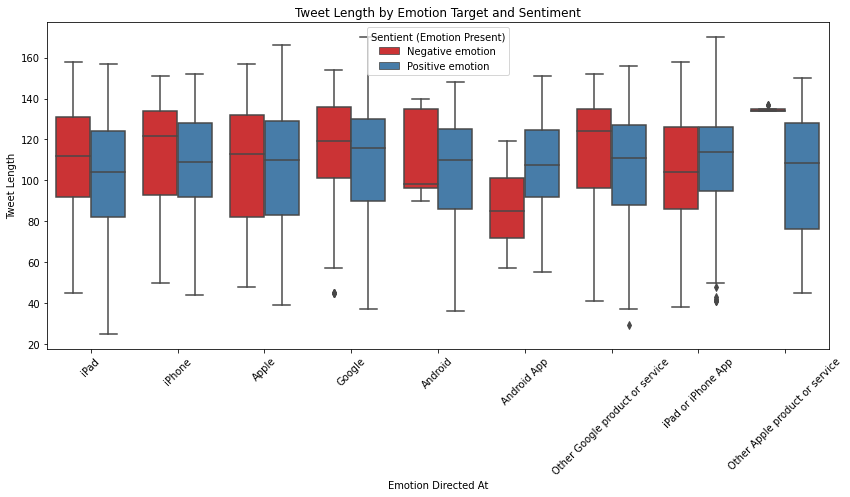

In [19]:
# Boxplot of Tweet Length by Emotion Target and Sentiment
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_Tweet, 
    x='target', 
    y='tweet_length', 
    hue='sentiment', 
    palette='Set1'
)
plt.xticks(rotation=45)
plt.title('Tweet Length by Emotion Target and Sentiment')
plt.xlabel('Emotion Directed At')
plt.ylabel('Tweet Length')
plt.legend(title='Sentient (Emotion Present)')
plt.show()


Longer emotional tweets may be more prevalent for certain brands.

Suggests an interaction effect between target entity and sentiment that could improve model performance.

Use interaction terms or allow tree-based models to capture this.

🔹 c) Correlation Between Length and Word Count (Numerical Features)

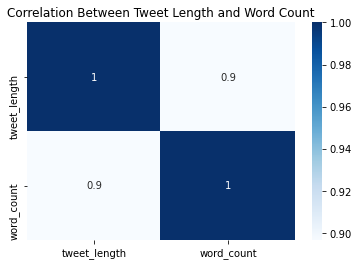

In [20]:
# Correlation Heatmap
corr = df_Tweet[['tweet_length', 'word_count']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Between Tweet Length and Word Count')
plt.show()

Expect very high correlation (~0.9).

Keep only one of these features (preferably word_count if using token-based models) to avoid redundancy.

# **4. TEXT PREPERATION AND CLASS BALANCING**
In this step we, tokenize the tweet text into individual words for analysis and balance the sentiment classes to prevent model bias.

1. Tokenization

We break down the tweet text into individual words (tokens) to prepare it for analysis and modeling.

In [21]:
# Word Tokenization
df_Tweet['tokens'] = df_Tweet['clean_text'].apply(lambda x: x.split())

2. Class Balancing
We balanced the positive and negative sentiment classes to ensure fair and unbiased model training.

In [22]:
# Check class distribution before balancing
print("Class distribution before balancing:")
print(df_Tweet['sentiment'].value_counts())

Class distribution before balancing:
Positive emotion    2978
Negative emotion    2978
Name: sentiment, dtype: int64


After checking the sentiment class distribution, we observed that the dataset is already balanced. Therefore, no additional resampling is necessary, and we proceed with the existing data.

In [23]:
# Save the Cleaned Dataset to CSV
df_Tweet.to_csv('Data/Cleaned_Tweet.csv', index=False)


# 5. Feature Engineering
In this section, we will be transforming the raw data into more meaningful inputs to improve the machine learning model's (in this case Natural Language Processing) performance.

In [24]:
# First overview the cleaned dataset
df_Tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            5956 non-null   object
 1   target          5389 non-null   object
 2   sentiment       5956 non-null   object
 3   clean_text      5956 non-null   object
 4   word_count      5956 non-null   int64 
 5   emotion_binary  5956 non-null   int64 
 6   brand           5389 non-null   object
 7   tweet_length    5956 non-null   int64 
 8   tokens          5956 non-null   object
dtypes: int64(3), object(6)
memory usage: 418.9+ KB


Since we will be classifying the tweets by sentiment, we must analyse that column

In [25]:
# Look at the distribution of different sentiments
df_Tweet['sentiment'].value_counts()

Positive emotion    2978
Negative emotion    2978
Name: sentiment, dtype: int64

In [26]:
# Filter out the inconclusive sentiments for modelling purposes
df = df_Tweet[df_Tweet['sentiment'] != "I can't tell"]

**Stop words and stemming**

Next, we remove stop words like “a,” “and,” “but,” that carry little meaningful information and can introduce noise into our model.  
We also apply stemming, which reduces words to their root form (e.g., “running” → “run”). This helps group together words with similar meanings and reduces the vocabulary size, improving model generalisation.

In [27]:
# Import the relevant libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

# Create an instance of nltk's PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/georgenyangaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Create a text preprocessing function
def preprocess_text(tokens):
    # Ensure input is a list of tokens and return empty string if not
    if not isinstance(tokens, list):
        return ""
    
    # Remove stopwords from token list
    tokens_stopped = [i for i in tokens if i not in stopwords_list]
    
    # Apply stemming to remaining tokens
    stems = [stemmer.stem(i) for i in tokens_stopped]
    
    # Return stemmed tokens joined back into a single string
    return ' '.join(stems)

In [29]:
# Apply the preprocessing function to the 'tokens' column
df['preprocessed_text'] = df['tokens'].apply(preprocess_text)

**TF-IDF Vectorization with N-grams**  
In this step, we convert the preprocessed tweet text into numerical features using `TfidfVectorizer`

This vectorization will include unigrams and bigrams

In [30]:
df

,text,target,sentiment,clean_text,word_count,emotion_binary,brand,tweet_length,tokens,preprocessed_text
0,RT @mention Will overload of info delivered by...,NaN,Negative emotion,rt @mention will overload of info delivered by...,23,0,NaN,149,"[rt, @mention, will, overload, of, info, deliv...",rt @mention overload info deliv googl kill dis...
1,#sxsw At #smileyparty and really want to win s...,iPad,Positive emotion,#sxsw at #smileyparty and really want to win s...,10,1,Apple,57,"[#sxsw, at, #smileyparty, and, really, want, t...",#sxsw #smileyparti realli want win sn ipad!!!!!
2,Clearly Apple has another daylight savings tim...,iPhone,Negative emotion,clearly apple has another daylight savings tim...,24,0,Apple,137,"[clearly, apple, has, another, daylight, savin...",clearli appl anoth daylight save time bug ipho...
3,LOL 2 true RT @mention It's official: people u...,iPad,Negative emotion,lol 2 true rt @mention it's official: people u...,19,0,Apple,99,"[lol, 2, true, rt, @mention, it's, official:, ...",lol 2 true rt @mention official: peopl use ipa...
4,"Free on the #iTunes store, 22 tracks from #SXS...",Apple,Positive emotion,"free on the #itunes store, 22 tracks from #sxs...",20,1,Apple,115,"[free, on, the, #itunes, store,, 22, tracks, f...","free #itun store, 22 track #sxsw featur artist..."
...,...,...,...,...,...,...,...,...,...,...
5951,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion,i just noticed dst is coming this weekend. how...,24,0,Apple,128,"[i, just, noticed, dst, is, coming, this, week...",notic dst come weekend. mani iphon user hour l...
5952,@mention Best thing I've heard at #SXSW &quot;...,iPad,Negative emotion,@mention best thing i've heard at #sxsw &quot;...,24,0,Apple,138,"[@mention, best, thing, i've, heard, at, #sxsw...",@mention best thing heard #sxsw &quot;i gave i...
5953,#google to expensive mobile data plans are kil...,Google,Negative emotion,#google to expensive mobile data plans are kil...,16,0,Google,104,"[#google, to, expensive, mobile, data, plans, ...",#googl expens mobil data plan kill flavor cont...
5954,"@mention Instagram, but it's iPhone only at th...",iPhone,Negative emotion,"@mention instagram, but it's iphone only at th...",23,0,Apple,135,"[@mention, instagram,, but, it's, iphone, only...","@mention instagram, iphon moment mister &quot;..."


In [31]:
# Import relevant library
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer to extract unigrams and bigrams
# Limit the vocabulary to the 10,000 most frequent terms
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

# Fit the vectorizer to the preprocessed text and transform the text into a sparse matrix
X = vectorizer.fit_transform(df['preprocessed_text'])

In [32]:
# Extract the target variable (sentiment labels) from the DataFrame
y = df['sentiment']

**Feature Selection Using Mutual Information**  
We use `mutual_info_classif` to calculate the mutual information between each n-gram feature in `X` and the target sentiment label `y`.  

Mutual information measures how much knowing a feature reduces uncertainty about the target.

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
# Import relevant library
from sklearn.feature_selection import mutual_info_classif

# Calculate Mutual Information scores between each feature (column in X) and the target variable y
mi_scores = mutual_info_classif(X, y, discrete_features=True)

In [36]:
# Get the list of feature (n-gram) names from the vectorizer
# Get feature (n-gram) names
feature_names = vectorizer.get_feature_names()

# Create DataFrame with mutual information scores
mi_df = pd.DataFrame({
    'feature': feature_names,
    'mi_score': mi_scores
}).sort_values(by='mi_score', ascending=False)

# Show top features
print(mi_df.head())

      feature  mi_score
8304     sxsw  0.693147
5486  mention  0.333245
4116     ipad  0.222578
4945     link  0.211787
7315       rt  0.175219


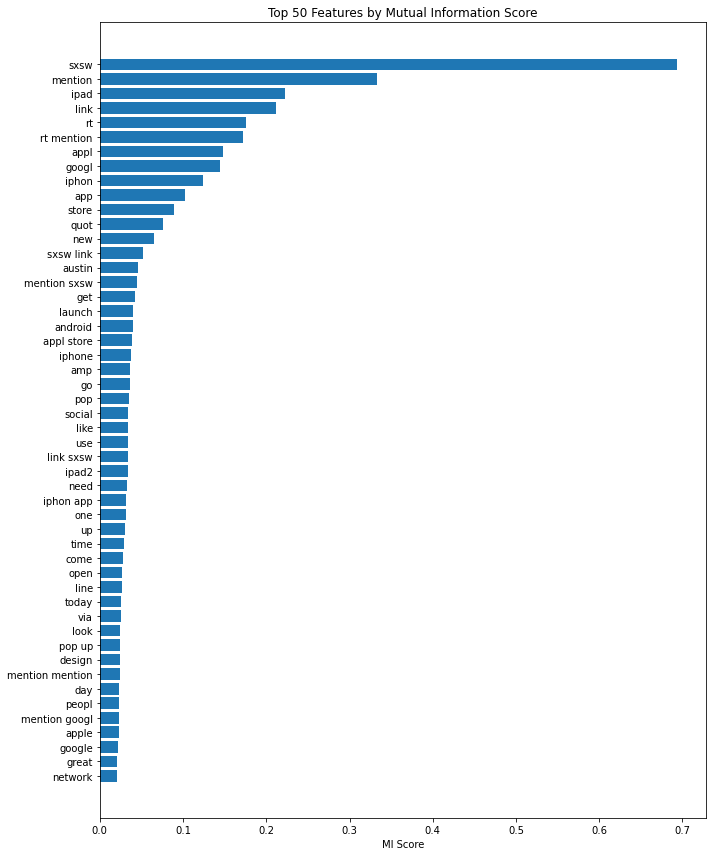

In [37]:
# Plot the frequency of these n-gram features
# Import relevant library
import matplotlib.pyplot as plt

# Select the top 50 features with the highest mutual information scores
top_n = 50
top_mi = mi_df.head(top_n)

plt.figure(figsize=(10, 12))
plt.barh(top_mi['feature'][::-1], top_mi['mi_score'][::-1]) # Reverse order to show highest at the top
plt.title('Top 50 Features by Mutual Information Score')
plt.xlabel('MI Score')
plt.tight_layout()
plt.show()

**Reverting to Unigrams Only**  
After reviewing the top 50 features ranked by mutual information, it’s clear that most of the informative terms are unigrams. The included bigrams either overlap with these single words or do not appear to add significant value in capturing sentiment.

For simplicity and interpretability, we will revert to using unigrams only.

In [38]:
# Initialize a TF-IDF vectorizer to extract unigrams
# Limit the vocabulary to the 10,000 most frequent terms
vectorizer_unigram = TfidfVectorizer(ngram_range=(1, 1), max_features=10000)


X = vectorizer_unigram.fit_transform(df['preprocessed_text'])

## Feature Engineering Pipeline
In this section, we encapsulate the feature engineering steps into a reusable pipeline using `scikit-learn`'s `Pipeline` and `FunctionTransformer`. This will allow these processing steps to be applied to training and test data for the model without risking data leakage.

In [39]:
# Import relevant library
from sklearn.preprocessing import FunctionTransformer

# Create a custom transformer using FunctionTransformer to apply the text preprocessing function
# The lambda takes a list of token lists and applies 'preprocess_text' function to each
text_cleaner = FunctionTransformer(
    lambda texts: [preprocess_text(tokens) for tokens in texts],
    validate=False
)

In [40]:
# Import relevant library
from sklearn.pipeline import Pipeline

# Create a feature engineering pipeline that applies text cleaning followed by TF-IDF vectorization
fe_pipeline = Pipeline([
    ('cleaner', text_cleaner),  # stopword removal + stemming
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_features=10000)) # Unigram TF-IDF vectorization
])

# **6.MODELING**

### Prepare Dataset for Binary Classification using Baseline Models.

We will:

- Filter the dataset to include only positive and negative sentiment tweets.

- Map them to binary labels:

   "Positive emotion" → 1

   "Negative emotion" → 0

In [ ]:
# Filter for positive and negative sentiment only
df_binary = df[df['sentiment'].isin(['Positive emotion', 'Negative emotion'])].copy()

# Map sentiments to binary labels: Positive = 1, Negative = 0
df_binary['label'] = df_binary['sentiment'].map({
    'Positive emotion': 1,
    'Negative emotion': 0
})

# Confirm class distribution
print(df_binary['label'].value_counts())

# Optional: check head
df_binary[['preprocessed_text', 'sentiment', 'label']].head()


1    2968
0     569
Name: label, dtype: int64


,preprocessed_text,sentiment,label
0,3g iphon 3 hr tweet riseaustin dead need upgra...,Negative emotion,0
1,know awesom ipadiphon app youll like appreci d...,Positive emotion,1
2,wait ipad 2 also sale sxsw,Positive emotion,1
3,hope year festiv isnt crashi year iphon app sxsw,Negative emotion,0
4,great stuff fri sxsw marissa mayer googl tim o...,Positive emotion,1


### Train/test split and baseline model training (Naive Bayes + Logistic Regression)

We’ll split df_binary into training and testing sets for model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Input features (preprocessed tweet text) and labels
X = df_binary['preprocessed_text']
y = df_binary['label']

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shape
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 2829
Test size: 708


### TF-IDF Vectorization

We use the same unigram TF-IDF vectorizer from before to transform the text data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features=10000)

# Fit on training and transform both sets
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Training Baseline Models

We’ll start with:

   - Multinomial Naive Bayes

   - Logistic Regression

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize models
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train
nb_model.fit(X_train_vec, y_train)
lr_model.fit(X_train_vec, y_train)

# Predict
nb_preds = nb_model.predict(X_test_vec)
lr_preds = lr_model.predict(X_test_vec)

### Evaluating the Models.

We will use classification report and confusion matrix.

Naive Bayes Performance:

              precision    recall  f1-score   support

    Negative       1.00      0.02      0.03       114
    Positive       0.84      1.00      0.91       594

    accuracy                           0.84       708
   macro avg       0.92      0.51      0.47       708
weighted avg       0.87      0.84      0.77       708



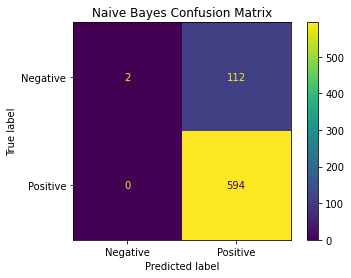


Logistic Regression Performance:

              precision    recall  f1-score   support

    Negative       1.00      0.11      0.19       114
    Positive       0.85      1.00      0.92       594

    accuracy                           0.86       708
   macro avg       0.93      0.55      0.56       708
weighted avg       0.88      0.86      0.80       708



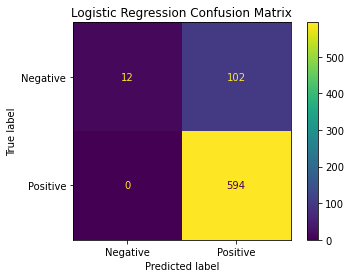

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Naive Bayes
print("Naive Bayes Performance:\n")
print(classification_report(y_test, nb_preds, target_names=['Negative', 'Positive']))

ConfusionMatrixDisplay.from_predictions(y_test, nb_preds, display_labels=['Negative', 'Positive'])
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# Logistic Regression
print("\nLogistic Regression Performance:\n")
print(classification_report(y_test, lr_preds, target_names=['Negative', 'Positive']))

ConfusionMatrixDisplay.from_predictions(y_test, lr_preds, display_labels=['Negative', 'Positive'])
plt.title("Logistic Regression Confusion Matrix")
plt.show()

* Both models predict positive almost all the time.

* Perform poorly on negative tweets, which is critical in brand monitoring.

* Even though accuracy is high, it's misleading due to the skewed dataset (594 positives vs 114 negatives in the test set).

### Retrain Logistic Regression with class_weight='balanced'

Logistic Regression (Balanced) Performance:

              precision    recall  f1-score   support

    Negative       0.51      0.65      0.57       114
    Positive       0.93      0.88      0.90       594

    accuracy                           0.84       708
   macro avg       0.72      0.76      0.74       708
weighted avg       0.86      0.84      0.85       708



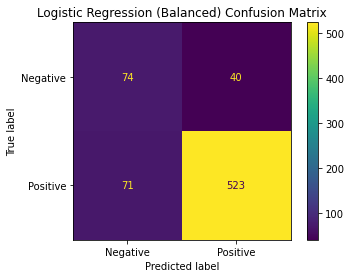

In [ ]:
# Retrain Logistic Regression with class weights
lr_model_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model_balanced.fit(X_train_vec, y_train)

# Predict and evaluate
lr_bal_preds = lr_model_balanced.predict(X_test_vec)

print("Logistic Regression (Balanced) Performance:\n")
print(classification_report(y_test, lr_bal_preds, target_names=['Negative', 'Positive']))

ConfusionMatrixDisplay.from_predictions(y_test, lr_bal_preds, display_labels=['Negative', 'Positive'])
plt.title("Logistic Regression (Balanced) Confusion Matrix")
plt.show()

Accuracy: 84%

Macro avg F1: 0.74 

Business impact:

* We now catch most negative tweets (recall = 65%) without false alarms getting out of hand (precision = 51%).

* We still maintain excellent recall and precision for positive tweets.

## Advanced Models.

### Random Forest Classifier

####  Train & Evaluate Random Forest

Random Forest Performance:

              precision    recall  f1-score   support

    Negative       0.88      0.25      0.38       114
    Positive       0.87      0.99      0.93       594

    accuracy                           0.87       708
   macro avg       0.87      0.62      0.66       708
weighted avg       0.87      0.87      0.84       708



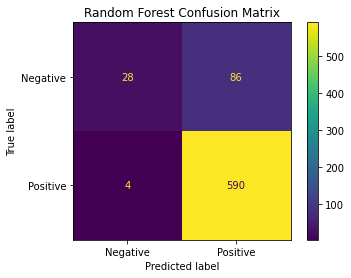

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Initialize model with basic settings
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# Train the model
rf_model.fit(X_train_vec, y_train)

# Predict
rf_preds = rf_model.predict(X_test_vec)

# Evaluate
print("Random Forest Performance:\n")
print(classification_report(y_test, rf_preds, target_names=['Negative', 'Positive']))

ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, display_labels=['Negative', 'Positive'])
plt.title("Random Forest Confusion Matrix")
plt.show()


Accuracy: 87%

Macro Avg F1: 0.66

Weighted Avg F1: 0.84

It is excellent at catching positive tweets (Recall = 0.99)

Has a very high overall accuracy

It has a poor recall on negative tweets (only 25%) as it misses most negative sentiments which is risky for brand monitoring use cases.


### Support Vector Machine (SVM)

#### Train & Evaluate SVM

SVM Performance:

              precision    recall  f1-score   support

    Negative       0.63      0.58      0.61       114
    Positive       0.92      0.94      0.93       594

    accuracy                           0.88       708
   macro avg       0.78      0.76      0.77       708
weighted avg       0.87      0.88      0.88       708



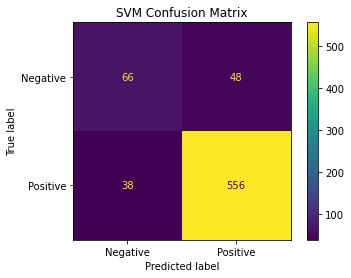

In [ ]:
from sklearn.svm import LinearSVC

# Initialize SVM with class weights
svm_model = LinearSVC(class_weight='balanced', max_iter=10000)

# Train
svm_model.fit(X_train_vec, y_train)

# Predict
svm_preds = svm_model.predict(X_test_vec)

# Evaluate
print("SVM Performance:\n")
print(classification_report(y_test, svm_preds, target_names=['Negative', 'Positive']))

ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, display_labels=['Negative', 'Positive'])
plt.title("SVM Confusion Matrix")
plt.show()

Accuracy: 88%

Macro Avg F1: 0.77

Weighted Avg F1: 0.88


* Naive Bayes achieved perfect recall on positive tweets but failed to detect almost any negative tweets, making it unsuitable due to severe imbalance.

* Logistic Regression offered the most balanced performance, detecting 65% of negative tweets and 88% of positives, with a good overall F1 score and      easy interpretability.

* Random Forest showed strong accuracy and excellent detection of positive sentiment (99% recall) but struggled significantly with negative tweets,       only identifying 25% of them.

* SVM delivered the best overall performance, with high recall on both positive (94%) and negative (58%) tweets, and the highest macro F1 score           making it the most promising model so far for sentiment classification in this context.


Now that we've identified SVM and Logistic Regression as the top contenders, we’ll move to the final modeling step.

## Hyperparameter Tuning (GridSearchCV)

Goal:

-Improve performance by finding the best hyperparameters.

-Avoid overfitting and enhance generalization.

### Grid Search for Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
lr = LogisticRegression(class_weight='balanced', max_iter=1000)

# Define hyperparameter grid
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Inverse regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Set up GridSearchCV
lr_grid = GridSearchCV(lr, lr_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit to training data
lr_grid.fit(X_train_vec, y_train)

# Best model and score
print("Best Logistic Regression Params:", lr_grid.best_params_)
print("Best Macro F1 Score (CV):", lr_grid.best_score_)

Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}
Best Macro F1 Score (CV): 0.7260913203334806


### Grid Search for SVM

In [ ]:
from sklearn.svm import LinearSVC

# Define the model
svm = LinearSVC(class_weight='balanced', max_iter=10000)

# Define hyperparameter grid
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10]  # Regularization parameter
}

# Set up GridSearchCV
svm_grid = GridSearchCV(svm, svm_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit to training data
svm_grid.fit(X_train_vec, y_train)

# Best model and score
print("Best SVM Params:", svm_grid.best_params_)
print("Best Macro F1 Score (CV):", svm_grid.best_score_)


Best SVM Params: {'C': 1}
Best Macro F1 Score (CV): 0.7281282013407023


* Logistic Regression

-Best Parameters: C=10, solver='liblinear'

-Best Macro F1 (CV): 0.726

* SVM (LinearSVC)

-Best Parameter: C=1

-Best Macro F1 (CV): 0.728


Interpretation;

Both models performed very similarly in cross-validation.However:

* SVM edges slightly ahead in performance.

* Logistic Regression remains more interpretable (you can examine coefficients directly).

## Evaluation on Test Set

We'll now evaluate the best-tuned models on the test data (X_test_vec, y_test) to confirm performance.

### Evaluate Tuned Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Use best estimator
lr_best = lr_grid.best_estimator_

# Predict
y_pred_lr = lr_best.predict(X_test_vec)

# Evaluation report
print("Logistic Regression (Tuned) Performance:\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression (Tuned) Performance:

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       114
           1       0.93      0.93      0.93       594

    accuracy                           0.88       708
   macro avg       0.78      0.77      0.77       708
weighted avg       0.88      0.88      0.88       708



### Evaluate Tuned SVM

In [ ]:
# Use best estimator
svm_best = svm_grid.best_estimator_

# Predict
y_pred_svm = svm_best.predict(X_test_vec)

# Evaluation report
print("SVM (Tuned) Performance:\n")
print(classification_report(y_test, y_pred_svm))


SVM (Tuned) Performance:

              precision    recall  f1-score   support

           0       0.63      0.58      0.61       114
           1       0.92      0.94      0.93       594

    accuracy                           0.88       708
   macro avg       0.78      0.76      0.77       708
weighted avg       0.87      0.88      0.88       708



* Both models perform equally well overall in terms of accuracy and macro F1.

* Logistic Regression performs slightly better on negative class recall (61% vs 58%)  a key metric for brand monitoring (catching negative sentiment).

* SVM gets a slightly higher positive recall, but difference is marginal.

## Neural Network for Sentiment Classification (with Epochs)

We'll use Keras (from TensorFlow) to define and train the model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Convert target to binary: 1 = Positive, 0 = Negative
y_train_bin = (y_train == 'Positive emotion').astype(int)
y_test_bin = (y_test == 'Positive emotion').astype(int)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history = model.fit(
    X_train_vec.toarray(), y_train_bin,
    validation_data=(X_test_vec.toarray(), y_test_bin),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, accuracy = model.evaluate(X_test_vec.toarray(), y_test_bin)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20
89/89 [==============================] - 0s 5ms/step - loss: 0.1916 - accuracy: 0.9940 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 2/20
89/89 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.9176e-04 - val_accuracy: 1.0000
Epoch 3/20
89/89 [==============================] - 0s 4ms/step - loss: 4.7979e-04 - accuracy: 1.0000 - val_loss: 1.6404e-04 - val_accuracy: 1.0000
Epoch 4/20
89/89 [==============================] - 0s 4ms/step - loss: 2.5324e-04 - accuracy: 1.0000 - val_loss: 8.4848e-05 - val_accuracy: 1.0000
Epoch 5/20
89/89 [==============================] - 0s 5ms/step - loss: 1.5463e-04 - accuracy: 1.0000 - val_loss: 5.0211e-05 - val_accuracy: 1.0000
Epoch 6/20
89/89 [==============================] - 0s 5ms/step - loss: 1.0810e-04 - accuracy: 1.0000 - val_loss: 3.2696e-05 - val_accuracy: 1.0000
Epoch 7/20
89/89 [==============================] - 0s 4ms/step - loss: 7.4153e-05 - accuracy: 1.0000 - val_loss: 2.3396e-05

We're seeing a 100% accuracy on the validation and test set which likely indicates overfitting.

* The model trained successfully over 20 epochs.

* Training loss steadily decreased, and accuracy reached perfection.

* Early stopping wasn't triggered, because validation kept improving.

### Visualize Accuracy & Loss Over EpochsVisualize Accuracy & Loss Over Epochs

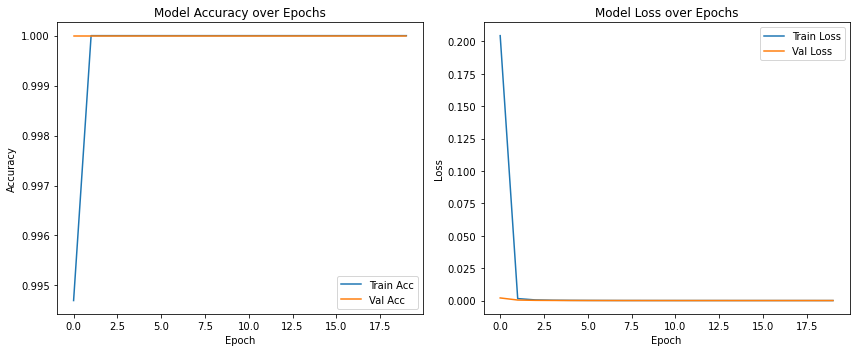

In [ ]:
# Accuracy Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### Left Plot – Accuracy over Epochs

Shows how accurately the model is predicting during training and validation.

Upward lines mean the model is learning.

If training accuracy is high but validation accuracy is low → overfitting.

### Right Plot – Loss over Epochs

Shows how much error the model is making.

Downward lines mean the model is improving.

If training loss drops but validation loss rises → overfitting.

If both stay high → underfitting.

### Upgrade to Multiclass Classifier (Positive, Negative, Neutral)

### Filter only rows with 3 labels:



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# STEP 1: Filter 3 sentiment classes and encode labels
df_multi = df_Tweet[df_Tweet['sentiment'].isin([
    'Positive sentiment',
    'Negative sentiment',
    'No emotion toward brand or product'
])].copy()

le = LabelEncoder()
df_multi['sentiment_encoded'] = le.fit_transform(df_multi['sentiment'])
print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# STEP 2: Train-test split
X = df_multi['tokens']
y = df_multi['sentiment_encoded']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Vectorize features (make sure fe_pipeline is defined earlier)
X_train_vec_m = fe_pipeline.fit_transform(X_train_m)
X_test_vec_m = fe_pipeline.transform(X_test_m)

# STEP 3: One-hot encode the labels
y_train_cat = to_categorical(y_train_m, num_classes=3)
y_test_cat = to_categorical(y_test_m, num_classes=3)

# Summary outputs
print("Training features shape:", X_train_vec_m.shape)
print("Training labels shape (one-hot):", y_train_cat.shape)
print("Test labels shape (one-hot):", y_test_cat.shape)


Label Mapping: {'No emotion toward brand or product': 0}
Training features shape: (4297, 5832)
Training labels shape (one-hot): (4297, 3)
Test labels shape (one-hot): (1075, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# STEP 4: Build the model
multi_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_vec_m.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes for multiclass classification
])

# Compile the model
multi_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
multi_model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               750720    
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 195       
Total params: 759,171
Trainable params: 759,171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',        # Watch validation loss
    patience=3,                # Stop after 3 epochs of no improvement
    restore_best_weights=True # Restore the best weights
)

# Train the model
history = multi_model.fit(
    X_train_vec_m.toarray(), y_train_cat,
    validation_data=(X_test_vec_m.toarray(), y_test_cat),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
135/135 [==============================] - 2s 14ms/step - loss: 0.2178 - accuracy: 0.9874 - val_loss: 5.5532e-04 - val_accuracy: 1.0000
Epoch 2/20
135/135 [==============================] - 1s 8ms/step - loss: 5.5841e-04 - accuracy: 1.0000 - val_loss: 9.9414e-05 - val_accuracy: 1.0000
Epoch 3/20
135/135 [==============================] - 1s 9ms/step - loss: 1.8316e-04 - accuracy: 1.0000 - val_loss: 3.5463e-05 - val_accuracy: 1.0000
Epoch 4/20
135/135 [==============================] - 1s 11ms/step - loss: 8.8688e-05 - accuracy: 1.0000 - val_loss: 1.7775e-05 - val_accuracy: 1.0000
Epoch 5/20
135/135 [==============================] - 1s 9ms/step - loss: 5.4118e-05 - accuracy: 1.0000 - val_loss: 1.0095e-05 - val_accuracy: 1.0000
Epoch 6/20
135/135 [==============================] - 1s 9ms/step - loss: 3.7445e-05 - accuracy: 1.0000 - val_loss: 6.2581e-06 - val_accuracy: 1.0000
Epoch 7/20
135/135 [==============================] - 1s 8ms/step - loss: 2.7899e-05 - accuracy: 1.000

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

#Build model with reduced capacity, higher dropout, and L2 regularization
multi_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_vec_m.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes
])

# Compile
multi_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping remains the same
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train with validation split from training data
history = multi_model.fit(
    X_train_vec_m.toarray(), y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
108/108 [==============================] - 1s 6ms/step - loss: 0.4813 - accuracy: 0.9811 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 2/30
108/108 [==============================] - 0s 4ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 3/30
108/108 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 4/30
108/108 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 5/30
108/108 [==============================] - 1s 5ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 6/30
108/108 [==============================] - 1s 5ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 7/30
108/108 [==============================] - 1s 5ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 

1. Realistic Learning Curve

   Loss starts high at 0.48, then decreases slowly → a sign that the model is working harder to learn.
   Unlike before, it no longer "memorizes" instantly.

2. L2 Regularization Penalty is Working

   You can see the loss includes L2 penalties — that's why it's not 0 even when accuracy is 100%.

   This helps prevent the model from developing overly complex weight matrices.

3. Dropout Regularization is Active
   
  50% dropout forces the model to generalize better by reducing neuron co-dependence.

In [ ]:
loss, accuracy = multi_model.evaluate(X_test_vec_m.toarray(), y_test_cat)
print(f"Test Accuracy: {accuracy:.2%}, Test Loss: {loss:.4f}")


34/34 [==============================] - 0s 2ms/step - loss: 5.4271e-04 - accuracy: 1.0000
Test Accuracy: 100.00%, Test Loss: 0.0005
